In [1]:
import os,sys
import pathlib
sys.path.append(os.path.abspath('./practico2'))


# Conociendo el SDSS

- En el sigiente <a href='https://www.sdss3.org/dr9/algorithms/magnitudes.php'>Link</a> podemos encontrar informacion del SDSS relacionada con Mediciones de Flujo y Magnitud

## Model Magnitudes: devMag, expMag, modelMag

### Photometric Models in SDSS

SDSS applies two main models to fit the light profiles of extended objects:

- De Vaucouleurs Profile (devMag): This model is often used for elliptical galaxies and is characterized by a profile where the surface brightness decreases with the radius following a de Vaucouleurs law: $$ I(r) = I_0 exp{\left(-7.67\left( \frac{r}{re}\right)^{\frac{1}{4}}\right)} $$
    -  The profile is truncated beyond $7r_{e}$ and smoothed within $r_{e}/50$

- Exponential Profile (expMag): This model is used for spiral galaxies and features an exponential decrease in brightness with radius: $$I(r) = I_0 exp{\left(-1.68\left( \frac{r}{re}\right)\right)}$$ 
    - The profile is truncated beyond $3r_{e}$ and smoothly goes to zero at $4r_{e}$.

- modelMag, uses the better of the two fits in the r-band as a matched aperture to calculate the flux in all bands. For extended objects, modelMag usually provides the best available SDSS colors.

### Fitting Procedures

- Each model is fit independently to the image of the galaxy in each SDSS band (u, g, r, i, z). The fitting process involves:

    - Adjusting Model Parameters: Each model has adjustable parameters like the effective radius $r_{e}$ axis ratio, and position angle. These are determined for both the de Vaucouleurs and exponential models.

    - Convolution with PSF: The models are convolved with the Point Spread Function (PSF) to account for the effects of seeing and the instrument's resolution.

### Model Quantities and Magnitudes

- Quantities Derived:For each model, quantities like effective radius ($r_{deV}$,$r_{Exp}$), axis ratio ($ab_{deV}$, $ab_{Exp}$), position angle ($\phi_{deV}$. $\phi_{Exp}$) and likelihoods ($deVlnL$,$ExplnL$) are calculated.

- Magnitudes: The total magnitudes derived from these models are deVMag , expMag

### Calculation of ModelMag

- Selection Process: The ModelMag for a galaxy is determined by selecting the model (either de Vaucouleurs or exponential) with the higher likelihood in the r-band. This chosen model is then applied to all other bands, adjusting the amplitude while considering the PSF in each band.

- Aperture Matching: The flux is measured through equivalent apertures in all bands to ensure consistency.

- Purpose: ModelMag is designed to provide a more accurate measure of a galaxy's flux by using the best-fitting model, leading to more reliable galaxy colors.

### Comparison with Other Magnitudes

- PSF Magnitudes: For point sources (stars), PSF magnitudes are optimal. ModelMag serves as a good proxy for PSF magnitudes for point-like sources.

- Petrosian Magnitudes: For extended sources like galaxies, Petrosian magnitudes are often used, but they can be less precise due to aperture effects. ModelMag typically has a higher signal-to-noise ratio compared to Petrosian magnitudes for faint galaxies and better captures global galaxy colors.

## Guia de que magnitud usar

- En el SDSS existen un monton de Magnitudes que se pueden utilizar.<a href='https://www.sdss3.org/dr9/algorithms/magnitudes.php'>aca</a> hay una guia de que magnitudes es conveniente utilizar.

- Para realizar fotometria de las galaxias cercanas es conveniente usar las petroMag
    - Petrosian Magnitudes: These are designed to measure the flux of extended sources while being less sensitive to local variations in seeing. Petrosian magnitudes are calculated using a method that involves measuring flux within an aperture defined by a fraction of the local surface brightness. This method is effective for capturing a large fraction of the galaxy’s total flux and remains relatively consistent with redshift.

- Para el color de las galaxias utilizamos modelMag

    - Model Magnitudes: These are derived from the best-fit model (either de Vaucouleurs or exponential) in the r-band and are applied consistently across all bands. This approach ensures that the measurement of light is consistent through the same aperture in all filters, leading to more accurate color determination.

# AB Magnitude System

<a href='https://www.sdss3.org/dr8/algorithms/fluxcal.php#SDSStoAB'>Documentacion Oficial</a>

- The AB magnitude system (or AB system) is a standard photometric system used in many astronomical surveys. It was introduced to provide a consistent framework for comparing magnitudes across different filters and telescopes. The AB magnitude system is designed so that the flux in each band is directly comparable, and it ensures that the magnitude of an object corresponds to its flux density in a straightforward manner.

## Conversion from SDSS ugriz to AB Magnitudes

- To convert SDSS ugriz magnitudes to AB magnitudes, you need to apply specific zero-point offsets that account for the differences in the calibration systems between SDSS and the AB system. The conversion involves adding or subtracting a fixed amount from the SDSS magnitudes to align them with the AB system.

- Understand the Zero Points: The SDSS system and the AB system use different zero points for their magnitudes. The zero points are constants that adjust the raw magnitude measurements to a standard reference system. For SDSS, these zero points are defined relative to the SDSS photometric system, while the AB system uses a different reference.

- Apply the Conversion Offsets: To convert SDSS magnitudes to AB magnitudes, you add or subtract specific constants to the SDSS magnitudes. These constants are determined by comparing the zero points of the SDSS system with those of the AB system. The offsets for the SDSS ugriz filters are as follows:

    - u : substract -0.036
    - g : add 0.012
    - r : add 0.010
    - i : add 0.028
    - z : add 0.040


# Elaboracion del practico 2

## Problema 3

- primero elimine valores por fuera de los requerimientos:
    - Seleccionar la submuestra 14.5 ≤ r ≤ 17.77
    - Seleccionar la submuestra petroR50 > 1.5[arcsec]

- Seleccionar los siguientes elementos:
    - Galaxy.fracDeV_r : Sin unidades , Weight of deV component in deV+Exp model
    - SpecObj.velDisp : Unidades = [km/s], Velocity dispersion
    - Pasar al sistema AB : ab_Corr = np.array([-0.036,0.012,0.010,0.028,0.040])

- Para convertir petroR50 y petroR90 a kpc tal y como pide la guia debemos utilizar la formula: $$d=\frac{1[kpc]}{0.004848 \times \theta[arcsec]}$$ donde $\theta$ es el angulo en arcsec (Tal y como provee el catalogo).

- Hay que convertir todas las petroMag y todas las modelMag al sistema AB (Sumando y restando las constantes correspondientes a cada banda).

- El color no es mas que una resta de magnitudes petroMag y modelMag

- El indice de concentracion se define como: $$C=\frac{R_{90}}{R_{50}}$$ este valor en SDSS suele ser de C=2.5. Este indice se suele utilizar las galaxias de tipo temprano (las mas elipticas) de las de tipo tardio (las mas espiraladas) (Recordar que tambien esta es una denominacion de Hubble poco fortuita porque tal evolucion no existe)

# Practico 2 
## Pasos

1) Corregi por extincion TODAS las bandas en el df.

In [7]:
import functions_p2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_table = os.path.abspath('./practico2/table3.csv')
df = functions_p2.process_table(path_table=path_table)

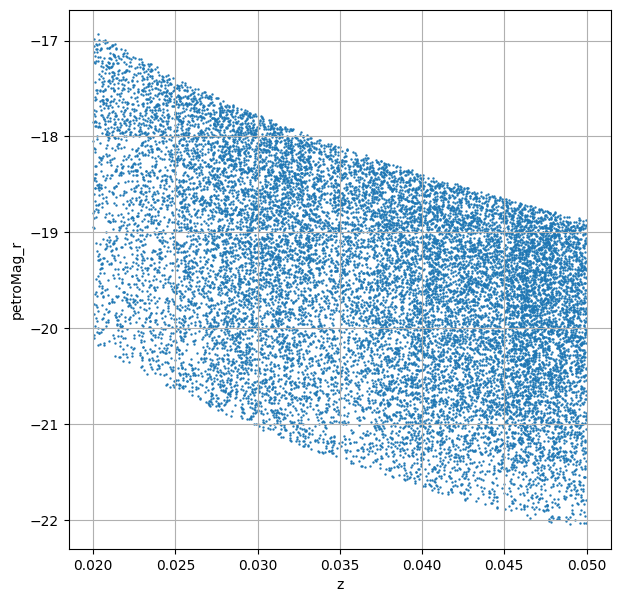

In [4]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['redshift'],df['petroMag_r'],s=0.5)
ax.set_xlabel('z')
ax.set_ylabel('petroMag_r')
ax.grid()
fig.show()

/tmp/ipykernel_190337/1755437723.py:7: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[1].set_xscale('log')


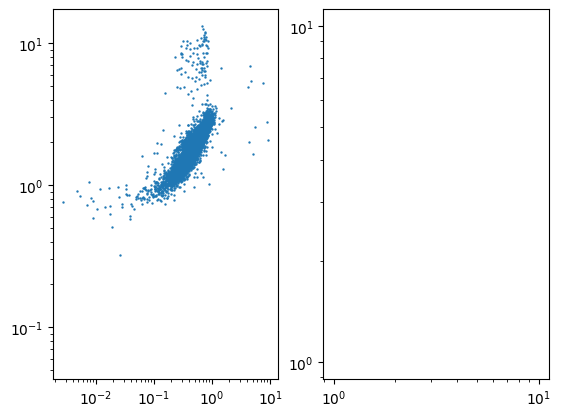

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(df['modelMag_gr'],df['modelMag_ur'],s=0.5)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[1].scatter(df['modelMag_r'],df['modelMag_gr'])
ax[1].set_yscale('log')
ax[1].set_xscale('log')


<Axes: xlabel='c_index', ylabel='Count'>

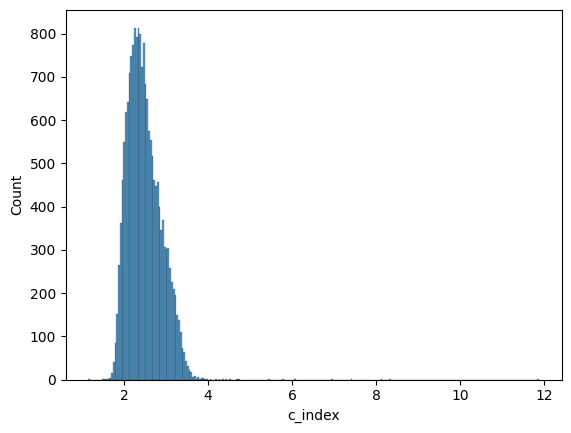

In [8]:
#Concentration index
sns.histplot(df['c_index'])

<Axes: xlabel='fracDeV_r', ylabel='Count'>

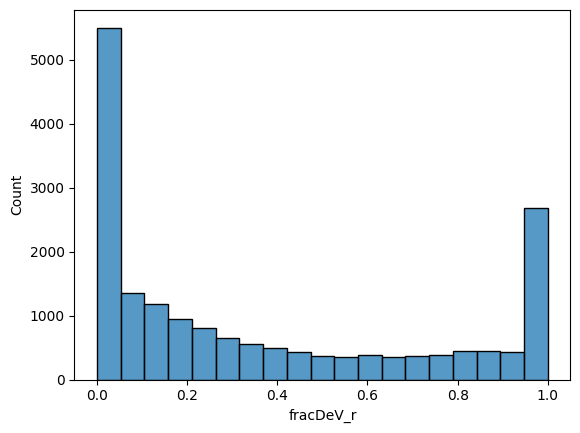

In [9]:
sns.histplot(df['fracDeV_r'])

In [14]:
#Hay correlacion entre C y u-r?
df[['c_index','modelMag_ur']].corr()

,c_index,modelMag_ur
c_index,1.000000,-0.004294
modelMag_ur,-0.004294,1.000000


# Relacion Tamanio Luminosidad

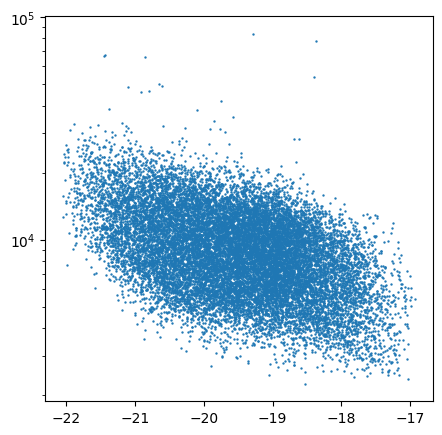

In [18]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['petroMag_r'],df['petroR50_r'],s=0.5)
ax.set_yscale('log')
fig.show()